### House Price Prediction Project

#### Starting with the data

The dataset is from kaggle which is has data from the cities of the state of Washington, USA.

In [125]:
#importing the necessry libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [78]:
df = pd.read_csv('data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


<AxesSubplot:xlabel='price', ylabel='Density'>

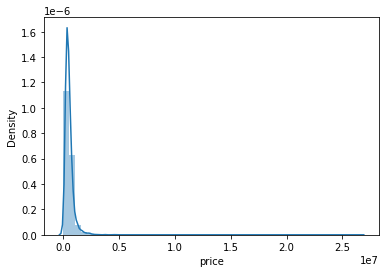

In [72]:
#Checking for the distribution of target varible price
sns.distplot(df['price'])
#it is right skewed which shows the less prices house are sold and purchased more

##### Processing the data

In [79]:
#dropping the unwanted columns
df1 = df.drop(['date','waterfront','view','country','street','yr_renovated','condition','sqft_basement','sqft_above','floors'],axis='columns')

In [80]:
#checking the dataset
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,city,statezip
0,313000.0,3.0,1.50,1340,7912,1955,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,9050,1921,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,11947,1966,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,1963,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,10500,1976,Redmond,WA 98052


In [81]:
df1.shape

(4600, 8)

In [82]:
#checking for null values
df1.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
yr_built       0
city           0
statezip       0
dtype: int64

##### Transforming the features

In [83]:
#modification to the zip code column
df1.groupby('statezip')['statezip'].agg('count')

df1['statezip'] = df1['statezip'].apply(lambda x : x.replace("WA","")) #removing character
df1['statezip'] = pd.to_numeric(df1['statezip']) #converting to numeric values
df1['statezip'].dtype

dtype('int64')

In [84]:
#checking for datatypes
print(df1['price'].dtype,df1['bedrooms'].dtype,df1['bathrooms'].dtype,df1["sqft_living"].dtype,df1["sqft_lot"].dtype)

float64 float64 float64 int64 int64


In [85]:
#checking random locations for values to check the parameters
df1.loc[10]

price                  463000.0
bedrooms                    3.0
bathrooms                  1.75
sqft_living                1710
sqft_lot                   7320
yr_built                   1948
city           Lake Forest Park
statezip                  98155
Name: 10, dtype: object

##### Feature Engineering

In [91]:
#creating a copy of dataframe
df2 = df1.copy()

In [92]:
#creating columns of total squarefoot by combining the other two
df2['total_sqft'] = df2['sqft_living'] + df2['sqft_lot']
df2.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,city,statezip,total_sqft
0,313000.0,3.0,1.5,1340,7912,1955,Shoreline,98133,9252
1,2384000.0,5.0,2.5,3650,9050,1921,Seattle,98119,12700
2,342000.0,3.0,2.0,1930,11947,1966,Kent,98042,13877


In [93]:
#dropping the sqft col of total lot
df2 = df2.drop('sqft_lot',axis='columns')
df2.head()

,price,bedrooms,bathrooms,sqft_living,yr_built,city,statezip,total_sqft
0,313000.0,3.0,1.50,1340,1955,Shoreline,98133,9252
1,2384000.0,5.0,2.50,3650,1921,Seattle,98119,12700
2,342000.0,3.0,2.00,1930,1966,Kent,98042,13877
3,420000.0,3.0,2.25,2000,1963,Bellevue,98008,10030
4,550000.0,4.0,2.50,1940,1976,Redmond,98052,12440


In [94]:
#creating new column consisting of price per square feet for living area
df2['price_per_sqft'] = df2['price']/df2['total_sqft'] #prices are in usd
df2.head(3)

,price,bedrooms,bathrooms,sqft_living,yr_built,city,statezip,total_sqft,price_per_sqft
0,313000.0,3.0,1.5,1340,1955,Shoreline,98133,9252,33.830523
1,2384000.0,5.0,2.5,3650,1921,Seattle,98119,12700,187.716535
2,342000.0,3.0,2.0,1930,1966,Kent,98042,13877,24.645096


In [95]:
#checking the categorical feature city
len(df2.city.unique())
location = df2.groupby('city')['city'].agg('count').sort_values(ascending=False) 
#this will give data points associated with each location and print in decreasing order of their lengths
location

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
Vashon                   29
SeaTac                   29
Tukwila                  29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Fall City                11
Medina                   11
Black Diamond             9
Ravensdale                7
Pacific        

In [96]:
#The city with less than 15 data point we will assign it as outskirts
location_less_than_15 = location[location<15]
location_less_than_15

city
Clyde Hill             11
Fall City              11
Medina                 11
Black Diamond           9
Ravensdale              7
Pacific                 6
Algona                  5
Yarrow Point            4
Skykomish               3
Preston                 2
Milton                  2
Snoqualmie Pass         1
Inglewood-Finn Hill     1
Beaux Arts Village      1
Name: city, dtype: int64

Dimensionality reduction

In [97]:
#applying the method to the column to reduce the dimensionality
df2.city = df2.city.apply(lambda x: "outskirts" if x in location_less_than_15 else x)
len(df2.city.unique()) # we will get the reduced dimension which will help while encoding 

31

In [99]:
df2.groupby('city')['city'].agg('count')

city
Auburn               176
Bellevue             286
Bothell               33
Burien                74
Carnation             22
Covington             43
Des Moines            58
Duvall                42
Enumclaw              28
Federal Way          148
Issaquah             187
Kenmore               66
Kent                 185
Kirkland             187
Lake Forest Park      36
Maple Valley          96
Mercer Island         86
Newcastle             33
Normandy Park         18
North Bend            50
Redmond              235
Renton               293
Sammamish            175
SeaTac                29
Seattle             1573
Shoreline            123
Snoqualmie            71
Tukwila               29
Vashon                29
Woodinville          115
outskirts             74
Name: city, dtype: int64

In [98]:
#checking for statezip unique values
df2.groupby('statezip')['statezip'].agg('count')

statezip
98001    67
98002    36
98003    48
98004    74
98005    29
         ..
98188    23
98198    56
98199    68
98288     3
98354     2
Name: statezip, Length: 77, dtype: int64

##### Outlier Removal

In [102]:
df3 = df2.copy()
df3.head(5)

,price,bedrooms,bathrooms,sqft_living,yr_built,city,statezip,total_sqft,price_per_sqft
0,313000.0,3.0,1.50,1340,1955,Shoreline,98133,9252,33.830523
1,2384000.0,5.0,2.50,3650,1921,Seattle,98119,12700,187.716535
2,342000.0,3.0,2.00,1930,1966,Kent,98042,13877,24.645096
3,420000.0,3.0,2.25,2000,1963,Bellevue,98008,10030,41.874377
4,550000.0,4.0,2.50,1940,1976,Redmond,98052,12440,44.212219


In [108]:
#for record
df3.shape

(4600, 9)

In [107]:
# Assuming The average of sqft for each bedroom in usa is 350 square feet
df3[df3.sqft_living/df3.bedrooms < 350]

,price,bedrooms,bathrooms,sqft_living,yr_built,city,statezip,total_sqft,price_per_sqft
67,310000.000000,3.0,1.00,1010,1973,Snoqualmie,98065,10955,28.297581
109,220000.000000,4.0,1.50,1240,1971,Federal Way,98023,10840,20.295203
110,657100.000000,4.0,1.00,1390,1924,Seattle,98103,5630,116.714032
115,340000.000000,5.0,1.00,1120,1962,Kirkland,98034,10142,33.523960
162,312000.000000,4.0,2.00,1300,1950,Seattle,98146,8354,37.347379
...,...,...,...,...,...,...,...,...,...
4477,135333.333333,4.0,1.00,1200,1944,Seattle,98178,8400,16.111111
4533,391400.000000,4.0,1.75,1250,1959,Bellevue,98008,8650,45.248555
4536,278900.000000,3.0,1.00,990,1968,Woodinville,98072,10788,25.852799
4537,171758.333333,3.0,1.00,1000,1991,Enumclaw,98022,9512,18.057016


In [109]:
df3 = df3[~(df3.sqft_living/df3.bedrooms < 350)] #by negating this , it wont contain the data with sqaure feet below 350 per bed
df3.shape #it will remove the 183 outliers assumed

(4417, 9)

In [111]:
#checking the stats of price per square feet
df3.price_per_sqft.describe()

count    4417.000000
mean       61.455639
std        66.030894
min         0.000000
25%        27.584419
50%        48.331298
75%        80.131209
max      2963.334448
Name: price_per_sqft, dtype: float64

In [114]:
df3.groupby('price_per_sqft')['price_per_sqft'].agg('count')
#we find here unusual price per sq feet which are 0 but it is not relevant practically

price_per_sqft
0.000000       47
0.382342        1
0.455501        1
0.503607        1
0.588753        1
               ..
302.290076      1
330.659537      1
758.891029      1
949.573027      1
2963.334448     1
Name: price_per_sqft, Length: 4352, dtype: int64

In [119]:
df3.head()

,price,bedrooms,bathrooms,sqft_living,yr_built,city,statezip,total_sqft,price_per_sqft
0,313000.0,3.0,1.50,1340,1955,Shoreline,98133,9252,33.830523
1,2384000.0,5.0,2.50,3650,1921,Seattle,98119,12700,187.716535
2,342000.0,3.0,2.00,1930,1966,Kent,98042,13877,24.645096
3,420000.0,3.0,2.25,2000,1963,Bellevue,98008,10030,41.874377
4,550000.0,4.0,2.50,1940,1976,Redmond,98052,12440,44.212219


In [121]:
#Assuming our dataset is normally distributed so by using the standard deviation we will filter the outliers
def remove_outliers(df):
    df_ = pd.DataFrame()

    for x,y in df.groupby('city'): #to get per location x = key and y = subdataframe
        mean = np.mean(y.price_per_sqft) #calculating the mean for each data point in location
        sd = np.std(y.price_per_sqft) #calculating the standarad deviation for each data point in location 
        reduced_df = y[(y.price_per_sqft>(mean-sd)) & (y.price_per_sqft < (mean+sd))] #the point should lie between 1 sd up and down the mean
        df_ = pd.concat([df_,reduced_df],ignore_index=True) #combining the dataframe
    return df_
df4 = remove_outliers(df3) #calling the function       
df4.shape  

(3261, 9)

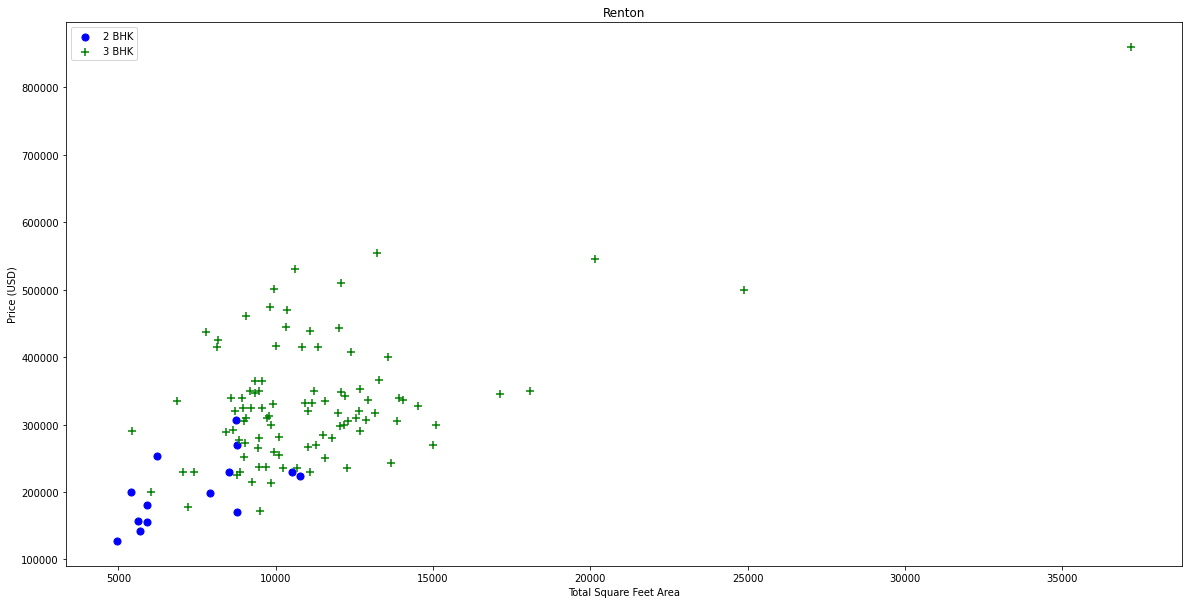

In [130]:
#function for scatter plot based on location 
def plot_scatter_chart(df,location):
    bhk2 = df[(df.city==location) & (df.bedrooms==2.0)]
    bhk3 = df[(df.city==location) & (df.bedrooms==3.0)]
    matplotlib.rcParams['figure.figsize'] = (20,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (USD)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df4,"Renton")

In [134]:
df5 = df4.copy()
df5.head()

,price,bedrooms,bathrooms,sqft_living,yr_built,city,statezip,total_sqft,price_per_sqft
0,367500.0,4.0,3.00,3110,1997,Auburn,98092,10341,35.538149
1,331950.0,4.0,2.50,2530,1990,Auburn,98092,12463,26.634839
2,328000.0,4.0,2.50,2370,1998,Auburn,98092,8870,36.978579
3,245000.0,3.0,1.75,1920,1984,Auburn,98001,11226,21.824336
4,360000.0,4.0,2.00,2680,1965,Auburn,98001,21448,16.784782


Creating a function to remove the outliers which has prices overlapping with the prices of houses having more square feet and in the same location

In [135]:
def remove_bedroom_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('city'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bedrooms'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bedrooms'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6 = remove_bedroom_outliers(df5)

df6.shape

(2047, 9)

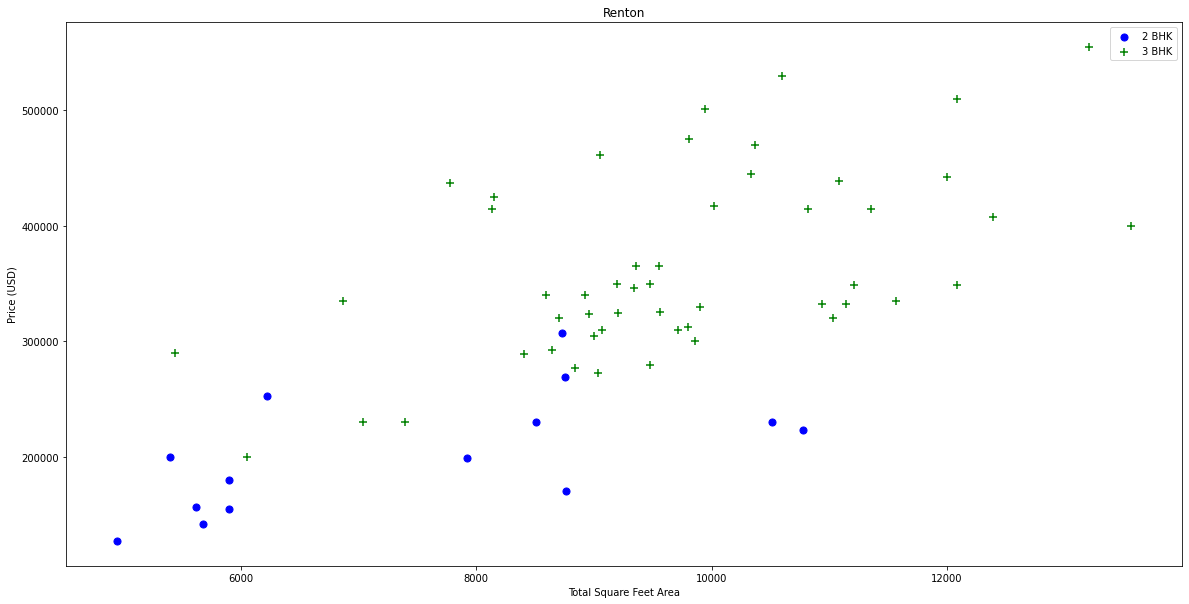

In [137]:
#visualizing after removal
plot_scatter_chart(df6,"Renton")

In [138]:
#looking for outliers based on number of bathrooms per bedroom, assuming 1 extra bath for number of bedrooms
df6[df6.bathrooms>df6.bedrooms+1]

,price,bedrooms,bathrooms,sqft_living,yr_built,city,statezip,total_sqft,price_per_sqft
3136,458000.0,1.0,2.25,2140,1976,Woodinville,98072,12490,36.669335


Text(0, 0.5, 'Count')

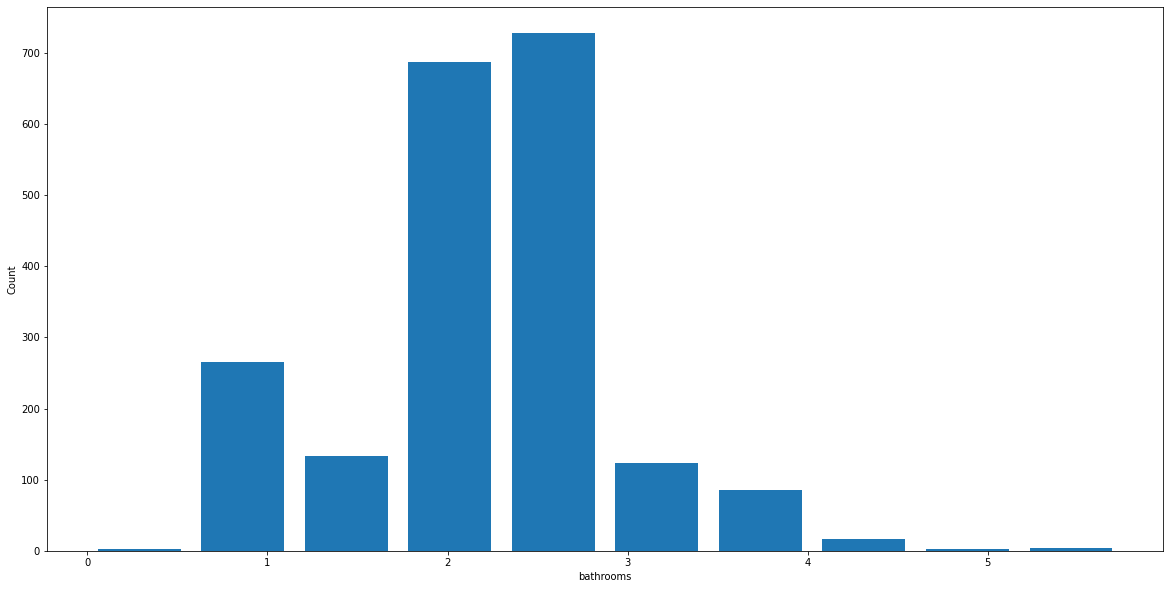

In [141]:
plt.hist(df6.bathrooms,rwidth=0.8)
plt.xlabel("bathrooms")
plt.ylabel("Count")
#2 and 2.5 have more frequency of bathrooms

In [147]:
#removing the above outlier
df7 = df6[df6.bathrooms<df6.bedrooms+1]
df7.shape

(2042, 9)

In [150]:
#dropping the unnecessary columns
df8 = df7.drop(['price_per_sqft','statezip'],axis = 1) 
df8.head()

,price,bedrooms,bathrooms,sqft_living,yr_built,city,total_sqft
0,367500.0,4.0,3.00,3110,1997,Auburn,10341
1,331950.0,4.0,2.50,2530,1990,Auburn,12463
2,328000.0,4.0,2.50,2370,1998,Auburn,8870
3,245000.0,3.0,1.75,1920,1984,Auburn,11226
5,197000.0,3.0,1.75,1690,1976,Auburn,9425


##### Encoding the features

In [190]:
#we can use OneHotEncoding or pandas dummies
encoded_df = pd.get_dummies(df8)
encoded_df.columns


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'yr_built',
       'total_sqft', 'city_Auburn', 'city_Bellevue', 'city_Bothell',
       'city_Burien', 'city_Carnation', 'city_Covington', 'city_Des Moines',
       'city_Duvall', 'city_Enumclaw', 'city_Federal Way', 'city_Issaquah',
       'city_Kenmore', 'city_Kent', 'city_Kirkland', 'city_Lake Forest Park',
       'city_Maple Valley', 'city_Mercer Island', 'city_Newcastle',
       'city_Normandy Park', 'city_North Bend', 'city_Redmond', 'city_Renton',
       'city_Sammamish', 'city_SeaTac', 'city_Seattle', 'city_Shoreline',
       'city_Snoqualmie', 'city_Tukwila', 'city_Vashon', 'city_Woodinville',
       'city_outskirts'],
      dtype='object')

In [192]:
df9 = pd.concat([df8,encoded_df.drop('city_outskirts',axis=1)],axis='columns')
df9.head(3)

,price,bedrooms,bathrooms,sqft_living,yr_built,city,total_sqft,price,bedrooms,bathrooms,...,city_Redmond,city_Renton,city_Sammamish,city_SeaTac,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Vashon,city_Woodinville
0,367500.0,4.0,3.0,3110,1997,Auburn,10341,367500.0,4.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1,331950.0,4.0,2.5,2530,1990,Auburn,12463,331950.0,4.0,2.5,...,0,0,0,0,0,0,0,0,0,0
2,328000.0,4.0,2.5,2370,1998,Auburn,8870,328000.0,4.0,2.5,...,0,0,0,0,0,0,0,0,0,0


In [193]:
#dropping the encoded feature
df9.drop('city',axis=1,inplace = True) 
df9.head(1)

,price,bedrooms,bathrooms,sqft_living,yr_built,total_sqft,price,bedrooms,bathrooms,sqft_living,...,city_Redmond,city_Renton,city_Sammamish,city_SeaTac,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Vashon,city_Woodinville
0,367500.0,4.0,3.0,3110,1997,10341,367500.0,4.0,3.0,3110,...,0,0,0,0,0,0,0,0,0,0


##### Model Building 

In [194]:
#removing the dependent variable and making set of independent varibles
X = df9.drop(['price'],axis=1) 
X.head(5)

,bedrooms,bathrooms,sqft_living,yr_built,total_sqft,bedrooms,bathrooms,sqft_living,yr_built,total_sqft,...,city_Redmond,city_Renton,city_Sammamish,city_SeaTac,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Vashon,city_Woodinville
0,4.0,3.00,3110,1997,10341,4.0,3.00,3110,1997,10341,...,0,0,0,0,0,0,0,0,0,0
1,4.0,2.50,2530,1990,12463,4.0,2.50,2530,1990,12463,...,0,0,0,0,0,0,0,0,0,0
2,4.0,2.50,2370,1998,8870,4.0,2.50,2370,1998,8870,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1.75,1920,1984,11226,3.0,1.75,1920,1984,11226,...,0,0,0,0,0,0,0,0,0,0
5,3.0,1.75,1690,1976,9425,3.0,1.75,1690,1976,9425,...,0,0,0,0,0,0,0,0,0,0


In [195]:
df9 = df9.drop_duplicates()

In [196]:
#creating dependent variable
y = df9['price']
len(y)

2042

In [197]:
#splitting into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [198]:
#fitting to model
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
linear_reg.score(X_test,y_test)

0.8035273328747816

In [200]:
# Standard Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#fitting to model
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
linear_reg.score(X_test,y_test)

0.7977501167030063

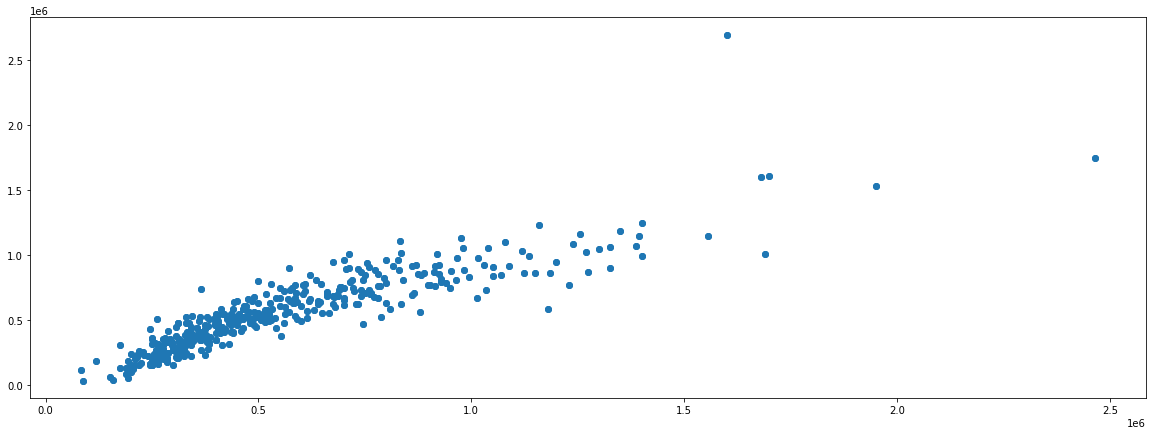

In [216]:
plt.scatter(y_test,linear_reg.predict(X_test))
matplotlib.rcParams['figure.figsize'] = [10,7]

Using K-fold cross validation to measure the accuracy of Model

In [217]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=4, test_size=0.25, random_state=0)
#checking score for Linear Regression
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.76159142, 0.79261648, 0.72967183, 0.76330101])

In [218]:
#Checking score for decision tree
from sklearn.tree import DecisionTreeRegressor
dt_classifier = DecisionTreeRegressor(random_state=0)
cross_val_score(dt_classifier,X,y,cv=cv)

array([0.57049791, 0.6836371 , 0.58522541, 0.62381025])

In [219]:
#random forest
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10,random_state=0)
cross_val_score(regressor,X,y,cv=cv)

array([0.76658988, 0.79430931, 0.71707839, 0.76545367])